In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("train.csv", parse_dates=["Order Date", "Ship Date"])


In [27]:
# Rename columns for ease
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Check missing values
print(df.isnull().sum())


row_id            0
order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_id       0
customer_name     0
segment           0
country           0
city              0
state             0
postal_code      11
region            0
product_id        0
category          0
sub-category      0
product_name      0
sales             0
dtype: int64


In [28]:
df['postal_code'] = df['postal_code'].fillna('0000')
print(df.isnull().sum())

row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub-category     0
product_name     0
sales            0
dtype: int64


In [29]:
#Top 5 customers by Revenue
top_customers = df.groupby('customer_name')['sales'].sum().nlargest(5)
top_customers = top_customers.apply(lambda x: f"${x:,.0f}")
print("💡 Top 5 Customers by Revenue:")
print(top_customers)

💡 Top 5 Customers by Revenue:
customer_name
Sean Miller      $25,043
Tamara Chand     $19,052
Raymond Buch     $15,117
Tom Ashbrook     $14,596
Adrian Barton    $14,474
Name: sales, dtype: object


In [30]:
#Most profitable categories, ascending order
category_profit = df.groupby('category')['sales'].sum().sort_values(ascending=False)
category_profit = category_profit.apply(lambda x: f"${x:,.0f}")
print("💡 Most Profitable Categories:")
print(category_profit)

💡 Most Profitable Categories:
category
Technology         $827,456
Furniture          $728,659
Office Supplies    $705,422
Name: sales, dtype: object


In [31]:
#Monthly sales trend
df['order_month'] = df['order_date'].dt.to_period('M')
monthly_sales = df.groupby('order_month')['sales'].sum()
monthly_sales_formatted = monthly_sales.apply(lambda x: f"${x:,.0f}")
print("💡 Monthly Sales Trend:")
print(monthly_sales_formatted.tail(6)) #Last 6 months


💡 Monthly Sales Trend:
order_month
2018-07    $53,943
2018-08    $75,409
2018-09    $73,153
2018-10    $65,501
2018-11    $87,998
2018-12    $56,959
Freq: M, Name: sales, dtype: object


In [32]:
#Average delivery time
df['delivery_days'] = (df['ship_date'] - df['order_date']).dt.days
avg_delivery = df['delivery_days'].mean()
print(f"Average delivery time: {avg_delivery:.2f} days")

Average delivery time: 9.22 days


In [33]:
#States with most orders, descending order
state_counts = df['state'].value_counts().head(5)
print(state_counts)

California      1946
New York        1097
Texas            973
Pennsylvania     582
Washington       504
Name: state, dtype: int64


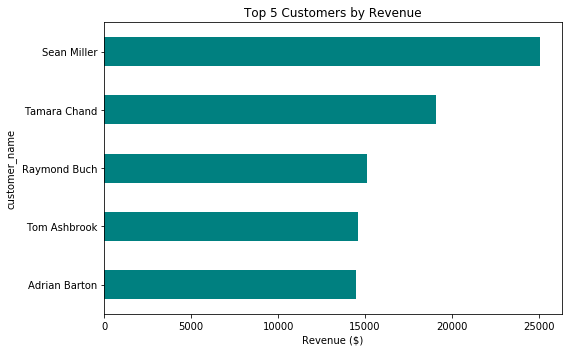

In [34]:
top_customers = df.groupby('customer_name')['sales'].sum().nlargest(5).sort_values()
top_customers.plot(kind='barh', color='teal', figsize=(8, 5))
plt.title('Top 5 Customers by Revenue')
plt.xlabel('Revenue ($)')
plt.tight_layout()
plt.show()

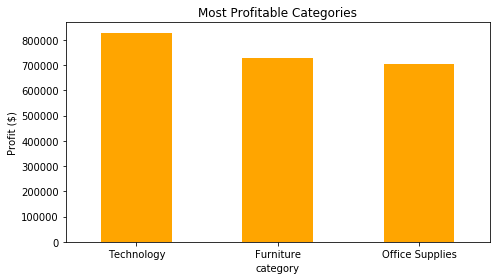

In [35]:
category_profit = df.groupby('category')['sales'].sum().sort_values(ascending=False)
category_profit.plot(kind='bar', color='orange', figsize=(7, 4))
plt.title('Most Profitable Categories')
plt.ylabel('Profit ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


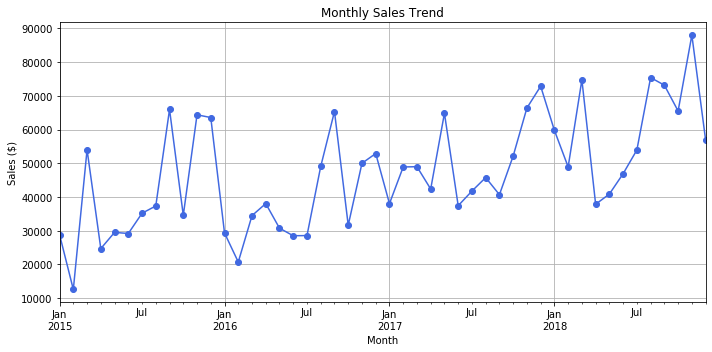

In [36]:
df['order_date'] = pd.to_datetime(df['order_date'])
monthly_sales = df.set_index('order_date').resample('M')['sales'].sum()

monthly_sales.plot(kind='line', marker='o', figsize=(10, 5), color='royalblue')
plt.title('Monthly Sales Trend')
plt.ylabel('Sales ($)')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()

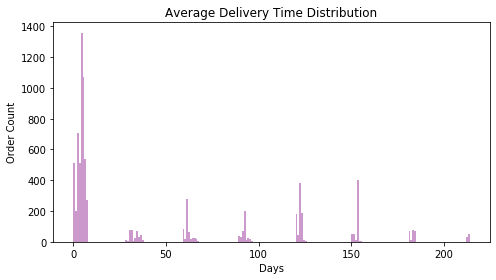

In [ ]:
df['ship_date'] = pd.to_datetime(df['ship_date'])

df['Delivery Time (days)'] = (df['ship_date'] - df['order_date']).dt.days

plt.figure(figsize=(7, 4))
sns.distplot(df['Delivery Time (days)'], bins=range(0, df['Delivery Time (days)'].max() + 1), color='purple', kde=False)
plt.title('Average Delivery Time Distribution')
plt.xlabel('Days')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()

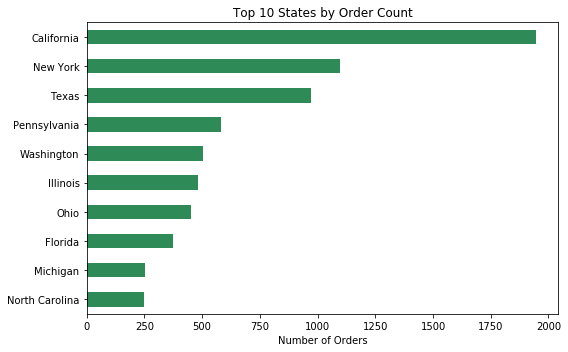

In [39]:
top_states = df['state'].value_counts().nlargest(10).sort_values()
top_states.plot(kind='barh', color='seagreen', figsize=(8, 5))
plt.title('Top 10 States by Order Count')
plt.xlabel('Number of Orders')
plt.tight_layout()
plt.show()
